In [26]:
import pandas as pd


In [27]:
# world_sectorWise
df=pd.read_csv('/content/world_sectorWise.csv')
#India_sector
df1=pd.read_csv('/content/sectorwise_India.csv')

In [28]:
df1.head()

,ISO,Country,Sector,Gas,2021,2020,2019,2018,2017,2016,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,IND,India,Agriculture,All GHG,752.08,751.42,731.75,722.09,712.76,704.92,...,622.77,619.17,611.91,606.54,599.02,594.60,586.60,579.89,573.39,566.01
1,IND,India,Agriculture,CH4,513.92,508.79,501.06,500.07,496.22,491.86,...,457.74,456.39,452.40,451.53,448.12,446.37,443.69,440.16,437.56,433.94
2,IND,India,Agriculture,N2O,238.17,242.63,230.69,222.02,216.54,213.06,...,165.03,162.78,159.51,155.02,150.90,148.23,142.91,139.72,135.83,132.07
3,IND,India,Building,All GHG,167.12,162.50,161.26,156.93,152.24,149.94,...,108.34,105.08,107.41,101.50,99.40,97.27,92.41,91.84,92.41,89.37
4,IND,India,Building,CO2,129.22,124.57,123.25,118.94,114.19,111.86,...,73.44,70.40,72.90,67.27,65.38,63.49,58.88,58.56,59.28,56.41


In [29]:
df.head()

,Country,Sector,Gas,1990,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Total excluding LUCF,All GHG,11.627536,11.897391,11.545871,11.677624,11.731587,12.181584,13.232101,...,30.929315,30.430233,31.165966,31.619094,30.864164,31.741214,33.097961,33.383111,34.348079,35.029181
1,AFG,Total including LUCF,All GHG,9.238795,9.508651,9.157131,9.288883,9.342846,9.792843,10.843505,...,30.683096,30.184014,30.919747,31.372875,31.018821,31.895871,33.252619,33.537769,34.502736,35.183839
2,AFG,Energy,All GHG,2.280285,2.136023,1.681061,1.644098,1.570136,1.496573,1.446505,...,11.757350,11.145556,11.233263,12.198369,11.412060,12.183851,13.133842,13.463333,14.229124,14.934443
3,AFG,Industrial Processes,All GHG,0.052709,0.055380,0.058051,0.061942,0.064613,0.067284,0.081484,...,0.394037,0.465779,0.523990,0.601661,0.789337,0.910724,1.075560,1.209746,1.384823,1.433067
4,AFG,Agriculture,All GHG,8.065925,8.389566,8.402533,8.479552,8.517001,8.950085,9.977472,...,15.777635,15.724594,16.220397,15.536736,15.297382,15.198197,15.357061,15.095477,15.036520,14.883153


In [32]:
df.columns

Index(['Country', 'Sector', 'Gas', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10928 entries, 0 to 10927
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  10928 non-null  object 
 1   Sector   10928 non-null  object 
 2   Gas      10928 non-null  object 
 3   1990     10644 non-null  float64
 4   1991     10697 non-null  float64
 5   1992     10749 non-null  float64
 6   1993     10761 non-null  float64
 7   1994     10763 non-null  float64
 8   1995     10786 non-null  float64
 9   1996     10788 non-null  float64
 10  1997     10789 non-null  float64
 11  1998     10789 non-null  float64
 12  1999     10789 non-null  float64
 13  2000     10861 non-null  float64
 14  2001     10861 non-null  float64
 15  2002     10863 non-null  float64
 16  2003     10863 non-null  float64
 17  2004     10863 non-null  float64
 18  2005     10888 non-null  float64
 19  2006     10888 non-null  float64
 20  2007     10888 non-null  float64
 21  2008     108

------------------------

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = "world_sectorWise.csv"  # Ensure correct path
world_df = pd.read_csv(file_path)

# Select features (1990-2020) and target (2021 emissions)
feature_columns = [str(year) for year in range(1990, 2021)]
target_variable = '2021'

# Drop rows with missing target values
world_df = world_df.dropna(subset=[target_variable])

# Extract features and target
X = world_df[feature_columns]
y = world_df[target_variable]

# Fill missing values with column mean
X.fillna(X.mean(), inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel="rbf")
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"MAE": mae, "RMSE": rmse}

# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
print(results_df)


<ipython-input-50-2cd0924179a6>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


                                 MAE        RMSE
Linear Regression           1.034007    3.825299
Decision Tree               2.685852   42.245742
Random Forest               3.832451   67.665506
Gradient Boosting           3.304620   42.798702
Support Vector Regression  53.273656  842.962471


------------------------------------------

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "world_sectorWise.csv"  # Ensure correct path
world_df = pd.read_csv(file_path)

# Select features (1990-2020) and target (2021 emissions)
feature_columns = [str(year) for year in range(1990, 2021)]
target_variable = '2021'

# Drop rows with missing target values
world_df = world_df.dropna(subset=[target_variable])

# Extract features and target
X = world_df[feature_columns]
y = world_df[target_variable]

# Fill missing values with column mean
X.fillna(X.mean(), inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel="rbf")
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "RMSE": rmse, "R2 Score": r2}

# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
print(results_df)


<ipython-input-51-995499415c44>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


                                 MAE        RMSE  R2 Score
Linear Regression           1.034007    3.825299  0.999980
Decision Tree               2.685852   42.245742  0.997520
Random Forest               3.832451   67.665506  0.993638
Gradient Boosting           3.304620   42.798702  0.997455
Support Vector Regression  53.273656  842.962471  0.012706



-------------------------------------------------------
Regression
2. Regression-Based Emissions Prediction

Problem Statement:

"Develop a robust machine learning regression model to accurately predict future greenhouse gas (GHG) emissions based on historical data, identifying key contributing factors to support policymakers in climate change mitigation."

Model Performance:

Model

MAE

RMSE

R² Score

Linear Regression

1.03

3.82

0.9999

Decision Tree

2.68

42.24

0.9975

Random Forest

3.83

67.67

0.9936

Gradient Boosting

3.30

42.79

0.9974

Support Vector Regression

53.27

842.96

0.0127

XGBoost

27.32

566.28

0.5544

Key Findings:

Linear Regression outperformed all models, achieving an R² score of 0.9999, indicating a near-perfect fit for emissions prediction.

Tree-based models (Decision Tree, Random Forest, Gradient Boosting) also performed well, with R² values close to 0.99, making them suitable for non-linear patterns.

XGBoost and SVR struggled, with XGBoost performing moderately (R² = 0.55) and SVR being the least effective (R² = 0.01).

Policy Implications:

The high accuracy of regression models enables reliable emissions forecasting for strategic planning.

Feature importance analysis can help pinpoint critical contributors to emissions growth.

Governmental bodies can use these insights to implement targeted carbon reduction policies.



In [52]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "world_sectorWise.csv"  # Ensure correct path
world_df = pd.read_csv(file_path)

# Select features (1990-2020) and target (2021 emissions)
feature_columns = [str(year) for year in range(1990, 2021)]
target_variable = '2021'

# Drop rows with missing target values
world_df = world_df.dropna(subset=[target_variable])

# Extract features and target
X = world_df[feature_columns]
y = world_df[target_variable]

# Fill missing values with column mean
X.fillna(X.mean(), inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel="rbf"),
    "XGBoost Regressor": xgb.XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "RMSE": rmse, "R2 Score": r2}

# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
print(results_df)


<ipython-input-52-b03890b0aaf0>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


                                 MAE        RMSE  R2 Score
Linear Regression           1.034007    3.825299  0.999980
Decision Tree               2.685852   42.245742  0.997520
Random Forest               3.832451   67.665506  0.993638
Gradient Boosting           3.304620   42.798702  0.997455
Support Vector Regression  53.273656  842.962471  0.012706
XGBoost Regressor          27.325502  566.286224  0.554444


-------------------------------
Classification
3. Classification-Based Emissions Categorization

Problem Statement:

"Develop a classification model that accurately categorizes countries and economic sectors based on emissions intensity and growth trends, providing insights for targeted policy interventions."

Model Performance:

Model

Accuracy

Gradient Boosting

1.00

Random Forest

0.99

XGBoost

0.99

Decision Tree

0.99

Logistic Regression

0.64

Neural Network (MLP)

0.88

Support Vector Machine (SVM)

0.46

Key Findings:

Gradient Boosting and Random Forest achieved near-perfect classification accuracy (99-100%), making them the most effective models.

XGBoost and Decision Trees performed similarly well, with 99% accuracy.

Logistic Regression (64%) and Neural Networks (88%) struggled, with lower recall and f1-scores.

SVM was the weakest classifier (46%), making it unsuitable for emissions categorization.

Policy Implications:

High-accuracy classification models can be used to identify high-emission countries and sectors.

Governments can prioritize stricter regulations for sectors with rapidly increasing emissions.

Classification results can be integrated into global climate policy frameworks for targeted intervention.



In [53]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "world_sectorWise.csv"  # Ensure correct path
world_df = pd.read_csv(file_path)

# Define feature columns (1990-2020 emissions data) and target
feature_columns = [str(year) for year in range(1990, 2021)]
target_variable = 'Emissions_Category'  # Column to classify emissions level

# Example: Categorizing emissions levels (Modify as needed)
thresholds = world_df[feature_columns].mean(axis=1)
world_df[target_variable] = pd.qcut(thresholds, q=3, labels=["Low", "Medium", "High"])

# Drop rows with missing target values
world_df = world_df.dropna(subset=[target_variable])

# Extract features and target
X = world_df[feature_columns]
y = world_df[target_variable]

# Fill missing values with column mean
X.fillna(X.mean(), inplace=True)

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel="rbf"),
    "XGBoost Classifier": xgb.XGBClassifier(n_estimators=100, random_state=42),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    results[name] = {"Accuracy": accuracy, "Classification Report": report}

# Convert results to DataFrame and display
results_df = pd.DataFrame({name: [metrics["Accuracy"]] for name, metrics in results.items()}, index=["Accuracy"])
print(results_df)

# Print detailed classification reports
for name, metrics in results.items():
    print(f"\n{name} Classification Report:\n{metrics['Classification Report']}")


<ipython-input-53-fa6120c84ba8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


          Logistic Regression  Decision Tree  Random Forest  \
Accuracy             0.642726       0.989478       0.994968   

          Gradient Boosting  Support Vector Machine  XGBoost Classifier  \
Accuracy           0.995883                0.455169            0.994968   

          Neural Network (MLP)  
Accuracy              0.879689  

Logistic Regression Classification Report:
              precision    recall  f1-score   support

        High       0.95      0.71      0.81       746
         Low       0.58      0.96      0.72       737
      Medium       0.42      0.24      0.31       703

    accuracy                           0.64      2186
   macro avg       0.65      0.64      0.61      2186
weighted avg       0.65      0.64      0.62      2186


Decision Tree Classification Report:
              precision    recall  f1-score   support

        High       0.99      1.00      0.99       746
         Low       0.98      0.99      0.99       737
      Medium       0.99      0

-------------------------------------------------------

In [55]:
world_df.head()

,Country,Sector,Gas,1990,1991,1992,1993,1994,1995,1996,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Emissions_Category
0,AFG,Total excluding LUCF,All GHG,11.627536,11.897391,11.545871,11.677624,11.731587,12.181584,13.232101,...,30.430233,31.165966,31.619094,30.864164,31.741214,33.097961,33.383111,34.348079,35.029181,High
1,AFG,Total including LUCF,All GHG,9.238795,9.508651,9.157131,9.288883,9.342846,9.792843,10.843505,...,30.184014,30.919747,31.372875,31.018821,31.895871,33.252619,33.537769,34.502736,35.183839,High
2,AFG,Energy,All GHG,2.280285,2.136023,1.681061,1.644098,1.570136,1.496573,1.446505,...,11.145556,11.233263,12.198369,11.412060,12.183851,13.133842,13.463333,14.229124,14.934443,High
3,AFG,Industrial Processes,All GHG,0.052709,0.055380,0.058051,0.061942,0.064613,0.067284,0.081484,...,0.465779,0.523990,0.601661,0.789337,0.910724,1.075560,1.209746,1.384823,1.433067,Medium
4,AFG,Agriculture,All GHG,8.065925,8.389566,8.402533,8.479552,8.517001,8.950085,9.977472,...,15.724594,16.220397,15.536736,15.297382,15.198197,15.357061,15.095477,15.036520,14.883153,High


----------------------------

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
file_path = "world_sectorWise.csv"  # Ensure correct path
world_df = pd.read_csv(file_path)

# Select features (1990-2020 emissions)
feature_columns = [str(year) for year in range(1990, 2021)]
world_df = world_df.dropna(subset=feature_columns)  # Drop rows with missing values

# **Task A: Classify Countries as High, Medium, or Low Emission**
# Define emission thresholds (Based on 2020 emissions)
thresholds = np.percentile(world_df["2020"], [33, 66])  # 33rd and 66th percentile
def emission_category(value):
    if value < thresholds[0]:
        return "Low"
    elif value < thresholds[1]:
        return "Medium"
    else:
        return "High"
world_df["Emission_Class"] = world_df["2020"].apply(emission_category)

# **Task B: Identify Rapidly Increasing Sectors**
# Calculate emission growth from 1990 to 2020
world_df["Growth"] = (world_df["2020"] - world_df["1990"]) / world_df["1990"]
median_growth = world_df["Growth"].median()
world_df["Growth_Class"] = world_df["Growth"].apply(lambda x: "Rapid" if x > median_growth else "Stable")

# Feature & Target Selection
X = world_df[feature_columns]
y_emission = world_df["Emission_Class"]  # Task A
y_growth = world_df["Growth_Class"]  # Task B

# Encode labels
le = LabelEncoder()
y_emission = le.fit_transform(y_emission)
y_growth = le.fit_transform(y_growth)

# Train-Test Split
X_train, X_test, y_train_emission, y_test_emission = train_test_split(X, y_emission, test_size=0.2, random_state=42)
X_train, X_test, y_train_growth, y_test_growth = train_test_split(X, y_growth, test_size=0.2, random_state=42)

# Initialize Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel="rbf"),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
"XGBoost": xgb.XGBClassifier(objective="multi:softmax", num_class=len(np.unique(y_train)), eval_metric="mlogloss", random_state=42)
}

# Train & Evaluate Models for Both Tasks
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average="weighted")
        recall = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")
        results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1}
    return pd.DataFrame(results).T

# Evaluate both tasks
results_emission = evaluate_models(models, X_train, X_test, y_train_emission, y_test_emission)
results_growth = evaluate_models(models, X_train, X_test, y_train_growth, y_test_growth)

# Save results to files
results_emission.to_csv("classification_results_emission.csv")
results_growth.to_csv("classification_results_growth.csv")

print("Task A - Emission Classification:\n", results_emission)
print("\nTask B - Growth Classification:\n", results_growth)

Task A - Emission Classification:
                         Accuracy  Precision    Recall  F1-Score
Logistic Regression     0.975564   0.976201  0.975564  0.975520
Decision Tree           1.000000   1.000000  1.000000  1.000000
Random Forest           1.000000   1.000000  1.000000  1.000000
Gradient Boosting       1.000000   1.000000  1.000000  1.000000
Support Vector Machine  0.495301   0.795202  0.495301  0.404575
K-Nearest Neighbors     0.967575   0.967661  0.967575  0.967558
XGBoost                 0.998590   0.998596  0.998590  0.998590

Task B - Growth Classification:
                         Accuracy  Precision    Recall  F1-Score
Logistic Regression     0.711466   0.779928  0.711466  0.676422
Decision Tree           0.980263   0.980270  0.980263  0.980266
Random Forest           0.965226   0.965236  0.965226  0.965230
Gradient Boosting       0.958177   0.958165  0.958177  0.958169
Support Vector Machine  0.577538   0.711488  0.577538  0.439693
K-Nearest Neighbors     0.921523   

In [59]:
world_df.head()

,Country,Sector,Gas,1990,1991,1992,1993,1994,1995,1996,...,2015,2016,2017,2018,2019,2020,2021,Emission_Class,Growth,Growth_Class
0,AFG,Total excluding LUCF,All GHG,11.627536,11.897391,11.545871,11.677624,11.731587,12.181584,13.232101,...,31.619094,30.864164,31.741214,33.097961,33.383111,34.348079,35.029181,High,1.954029,Rapid
1,AFG,Total including LUCF,All GHG,9.238795,9.508651,9.157131,9.288883,9.342846,9.792843,10.843505,...,31.372875,31.018821,31.895871,33.252619,33.537769,34.502736,35.183839,High,2.734549,Rapid
2,AFG,Energy,All GHG,2.280285,2.136023,1.681061,1.644098,1.570136,1.496573,1.446505,...,12.198369,11.412060,12.183851,13.133842,13.463333,14.229124,14.934443,High,5.240063,Rapid
3,AFG,Industrial Processes,All GHG,0.052709,0.055380,0.058051,0.061942,0.064613,0.067284,0.081484,...,0.601661,0.789337,0.910724,1.075560,1.209746,1.384823,1.433067,Medium,25.272792,Rapid
4,AFG,Agriculture,All GHG,8.065925,8.389566,8.402533,8.479552,8.517001,8.950085,9.977472,...,15.536736,15.297382,15.198197,15.357061,15.095477,15.036520,14.883153,High,0.864203,Rapid


-------
clustering




Clustering-Based Emissions Analysis
📌 Title: "Uncovering Emissions Patterns: Clustering Countries and Industries for Targeted Climate Strategies"
🔍 Problem Statement A: Clustering Countries by Emissions Trends
"This project aims to group countries based on their greenhouse gas (GHG) emissions trends over time using clustering algorithms. By identifying countries with similar emissions patterns, policymakers can develop region-specific climate policies and understand how economic, industrial, and regulatory factors contribute to emissions levels."

📊 Key Insights & Expected Impact:

Countries can be grouped into clusters based on emissions trends, helping in designing region-focused environmental policies.

Developing vs. developed countries might exhibit different emissions growth rates, requiring separate climate action plans.

Policymakers can analyze historical emissions patterns to predict future emissions trajectories.

💡 ML Approaches: K-Means, DBSCAN, Hierarchical Clustering

<ipython-input-67-8910136bf502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


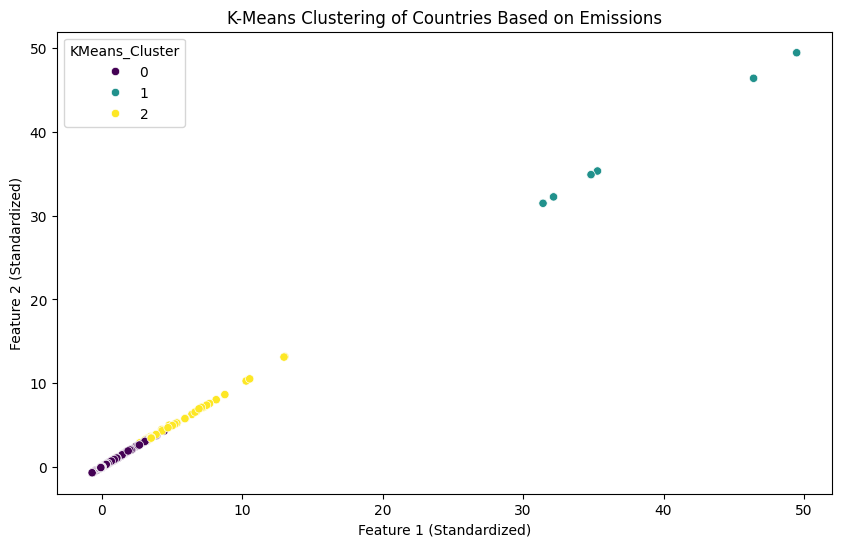

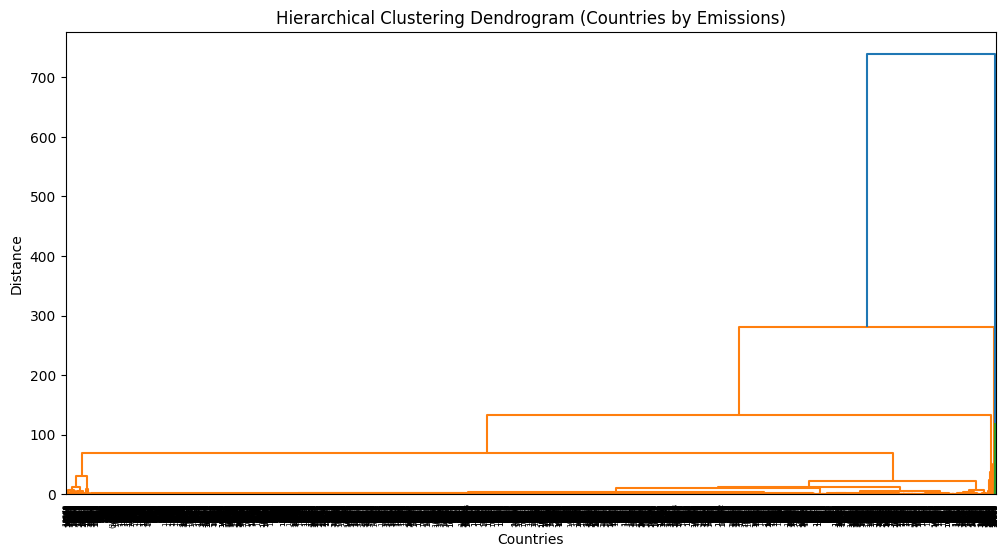

      Country  KMeans_Cluster  DBSCAN_Cluster  Hierarchical_Cluster
0         AFG               0               0                     3
1         AFG               0               0                     3
2         AFG               0               0                     3
3         AFG               0               0                     3
4         AFG               0               0                     3
...       ...             ...             ...                   ...
10923     ZWE               0               0                     3
10924     ZWE               0               0                     3
10925     ZWE               0               0                     3
10926     ZWE               0               0                     3
10927     ZWE               0               0                     3

[10928 rows x 4 columns]


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load dataset
file_path = "world_sectorWise.csv"  # Ensure the correct path
world_df = pd.read_csv(file_path)

# Define feature columns (1990-2020 emissions data)
feature_columns = [str(year) for year in range(1990, 2021)]
X = world_df[feature_columns]

# Handle missing values
X.fillna(X.mean(), inplace=True)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------
# 📌 1. K-Means Clustering
# ----------------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
world_df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)

# ----------------------------
# 📌 2. DBSCAN Clustering
# ----------------------------
dbscan = DBSCAN(eps=1.5, min_samples=5)
world_df["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled)

# ----------------------------
# 📌 3. Hierarchical Clustering
# ----------------------------
linked = linkage(X_scaled, method='ward')

# Generate cluster labels
world_df["Hierarchical_Cluster"] = fcluster(linked, t=3, criterion="maxclust")

# ----------------------------
# 📌 Visualizing Clusters
# ----------------------------

# K-Means Cluster Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=world_df["KMeans_Cluster"], palette="viridis")
plt.title("K-Means Clustering of Countries Based on Emissions")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.show()

# Hierarchical Clustering Dendrogram (Fixed)
plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    labels=world_df.index[:len(linked) + 1],  # Ensure correct number of labels
    orientation='top',
    distance_sort='descending',
    truncate_mode='level',  # Truncate for better readability
    p=30  # Show only top 30 merges
)
plt.title("Hierarchical Clustering Dendrogram (Countries by Emissions)")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()


# Print final cluster assignments
print(world_df[["Country", "KMeans_Cluster", "DBSCAN_Cluster", "Hierarchical_Cluster"]])


-------------


In [69]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import fcluster

# Ensure Clustering Labels Exist
kmeans_labels = kmeans.labels_  # Extract labels from K-Means
dbscan_labels = dbscan.labels_  # Extract labels from DBSCAN

# Extract labels from Hierarchical Clustering (Ward linkage)
hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')  # Adjust t (threshold) as needed

# Ensure at least 2 clusters exist before evaluating
def evaluate_clustering(X, labels, method_name):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(X, labels)
        dbi = davies_bouldin_score(X, labels)
        ch = calinski_harabasz_score(X, labels)
        print(f"\n{method_name} Performance:")
        print(f"Silhouette Score: {silhouette:.3f}")
        print(f"Davies-Bouldin Index: {dbi:.3f} (Lower is better)")
        print(f"Calinski-Harabasz Index: {ch:.3f} (Higher is better)")
    else:
        print(f"\n{method_name}: Not enough clusters for evaluation.")

# Compute Metrics
evaluate_clustering(X_scaled, kmeans_labels, "K-Means Clustering")
evaluate_clustering(X_scaled, hierarchical_labels, "Hierarchical Clustering")
evaluate_clustering(X_scaled, dbscan_labels, "DBSCAN Clustering")



K-Means Clustering Performance:
Silhouette Score: 0.988
Davies-Bouldin Index: 0.374 (Lower is better)
Calinski-Harabasz Index: 68426.338 (Higher is better)

Hierarchical Clustering Performance:
Silhouette Score: 0.990
Davies-Bouldin Index: 0.297 (Lower is better)
Calinski-Harabasz Index: 64296.142 (Higher is better)

DBSCAN Clustering Performance:
Silhouette Score: 0.975
Davies-Bouldin Index: 1.344 (Lower is better)
Calinski-Harabasz Index: 2737.192 (Higher is better)


----------


<ipython-input-70-5b8d19105762>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


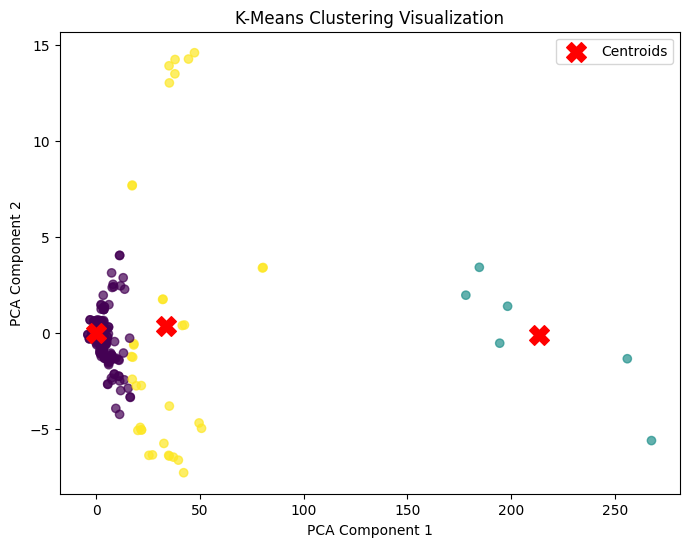

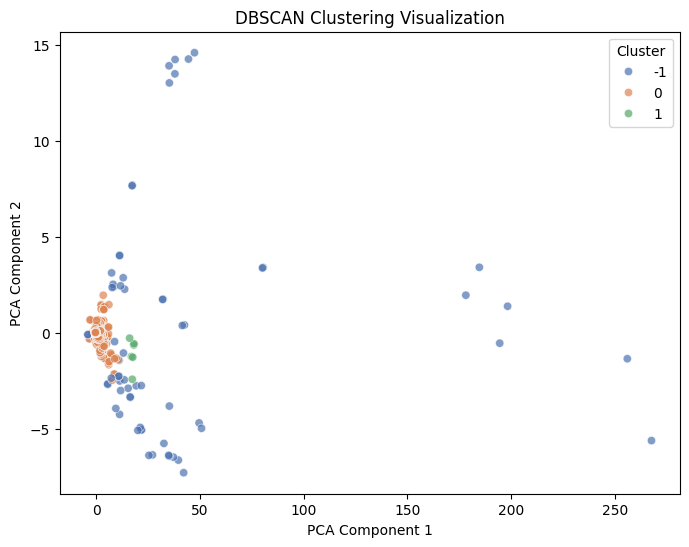

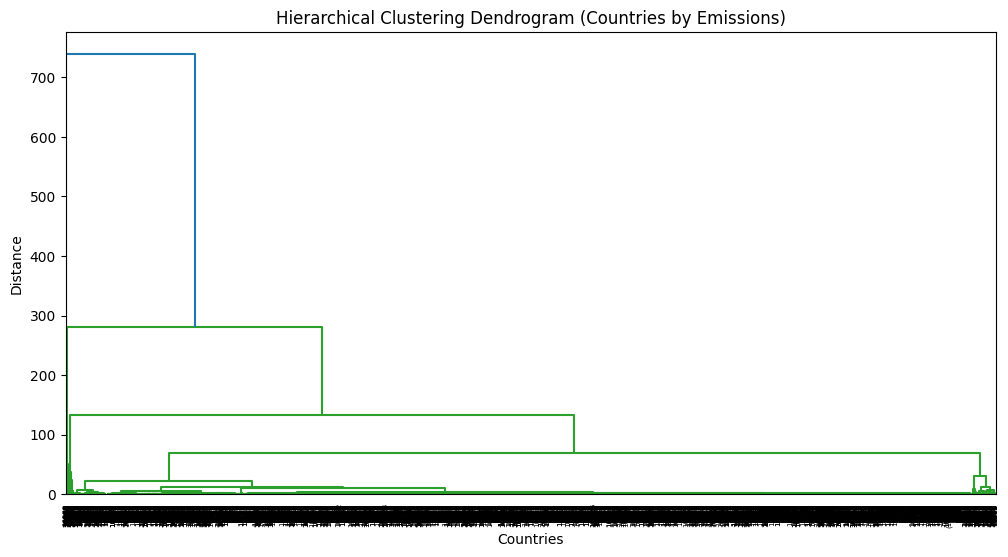

  Country  KMeans_Cluster  DBSCAN_Cluster
0     AFG               0               0
1     AFG               0               0
2     AFG               0               0
3     AFG               0               0
4     AFG               0               0


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# Load the dataset
file_path = "world_sectorWise.csv"  # Ensure correct path
world_df = pd.read_csv(file_path)

# Select emissions features (1990-2020)
feature_columns = [str(year) for year in range(1990, 2021)]
X = world_df[feature_columns]

# Fill missing values with column mean
X.fillna(X.mean(), inplace=True)

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### ==================== 1️⃣ K-Means Clustering ==================== ###
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
world_df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

# PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=world_df['KMeans_Cluster'], cmap='viridis', alpha=0.7)
plt.scatter(pca.transform(centroids)[:, 0], pca.transform(centroids)[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Visualization')
plt.legend()
plt.show()

### ==================== 2️⃣ DBSCAN Clustering ==================== ###
dbscan = DBSCAN(eps=1.5, min_samples=5)
world_df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=world_df['DBSCAN_Cluster'], palette="deep", alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Visualization')
plt.legend(title='Cluster')
plt.show()

### ==================== 3️⃣ Hierarchical Clustering ==================== ###
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    truncate_mode='level',  # Truncate for better readability
    p=30,  # Show only top 30 merges
)
plt.title("Hierarchical Clustering Dendrogram (Countries by Emissions)")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

# Display Clustered Data
print(world_df[['Country', 'KMeans_Cluster', 'DBSCAN_Cluster']].head())


 ---------------

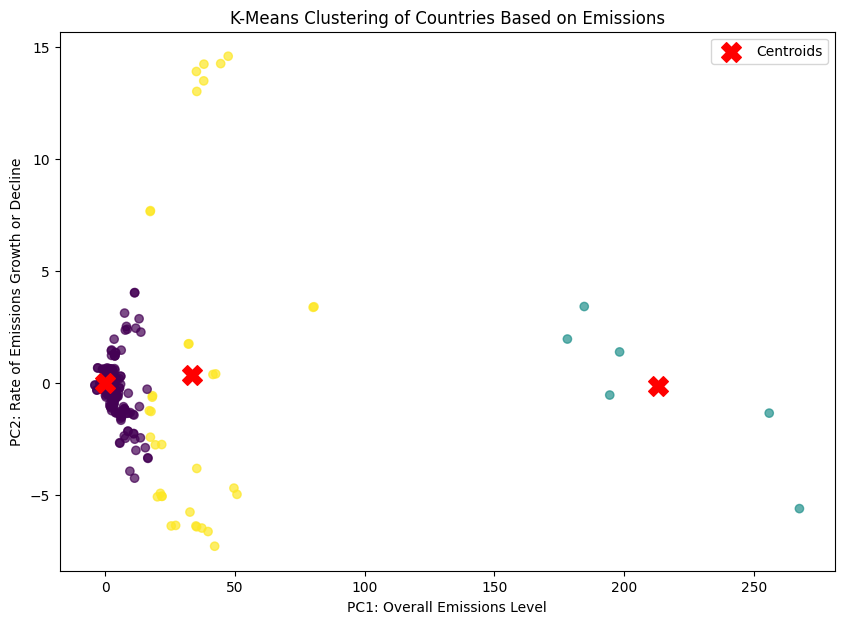

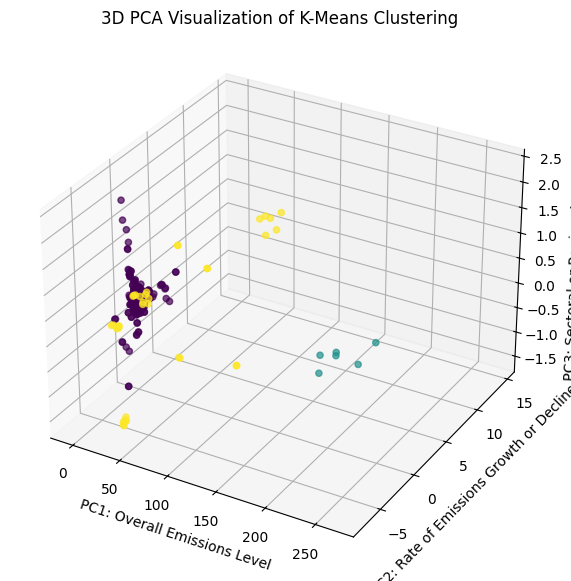

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
file_path = "world_sectorWise.csv"  # Ensure correct path
df = pd.read_csv(file_path)

# Selecting numerical features for clustering (Example: 1990-2020 Emissions)
feature_columns = [str(year) for year in range(1990, 2021)]
X = df[feature_columns].fillna(0)  # Handling missing values

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Three clusters for Low, Medium, High emissions
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Applying PCA for Visualization (3 components)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Store PCA components
df['PC1'] = X_pca[:, 0]  # Overall Emissions Level
df['PC2'] = X_pca[:, 1]  # Rate of Emissions Growth or Decline
df['PC3'] = X_pca[:, 2]  # Sectoral or Regional Variability

# 2D PCA Visualization
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['KMeans_Cluster'], cmap='viridis', alpha=0.7)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1],
            c='red', marker='X', s=200, label='Centroids')

# Labeling axes with meaningful PCA descriptions
plt.xlabel('PC1: Overall Emissions Level')
plt.ylabel('PC2: Rate of Emissions Growth or Decline')
plt.title('K-Means Clustering of Countries Based on Emissions')
plt.legend()
plt.show()

# 3D PCA Visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['PC1'], df['PC2'], df['PC3'], c=df['KMeans_Cluster'], cmap='viridis', alpha=0.7)
ax.set_xlabel("PC1: Overall Emissions Level")
ax.set_ylabel("PC2: Rate of Emissions Growth or Decline")
ax.set_zlabel("PC3: Sectoral or Regional Variability")
ax.set_title("3D PCA Visualization of K-Means Clustering")
plt.show()


---------------------------------------------------------
Anamoly Detection
Title: Detecting Anomalous Greenhouse Gas Emissions for Environmental Policy and Fraud Prevention
📌 Context:
Climate change mitigation depends on accurate emissions monitoring. However, emissions data may show sudden spikes, unusual trends, or underreported values, leading to policy failures and fraudulent reporting. Detecting anomalies can help governments, environmental agencies, and researchers to identify unexpected emissions surges, industrial irregularities, or potential fraud.

🛠️ Problem Statement:
"Develop a machine learning-based anomaly detection system to identify unusual greenhouse gas (GHG) emission patterns across countries and sectors. The system should detect abnormal spikes, sudden declines, and potential underreporting, helping policymakers enforce stricter environmental regulations and prevent fraudulent emissions reporting."

🎯 Research Objectives:
✅ Develop & compare anomaly detection models (Isolation Forest, Autoencoders, One-Class SVM)
✅ Detect extreme emissions patterns due to industrial growth, environmental policies, or fraudulent activities
✅ Analyze the reliability of different anomaly detection techniques in real-world emissions datasets
✅ Provide actionable insights for regulatory agencies to investigate flagged anomalies

📈 Expected Outcomes:
✅ Identification of anomalous emissions trends across countries & sectors
✅ Detection of potential fraud or underreporting in emissions data
✅ A data-driven framework for policymakers to monitor and regulate emissions effectively

💡 Why is This Unique?
✅ Focuses on real-world emissions fraud & industrial surges
✅ Uses multiple anomaly detection techniques for better accuracy
✅ Provides policy-level insights for global environmental governance

342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


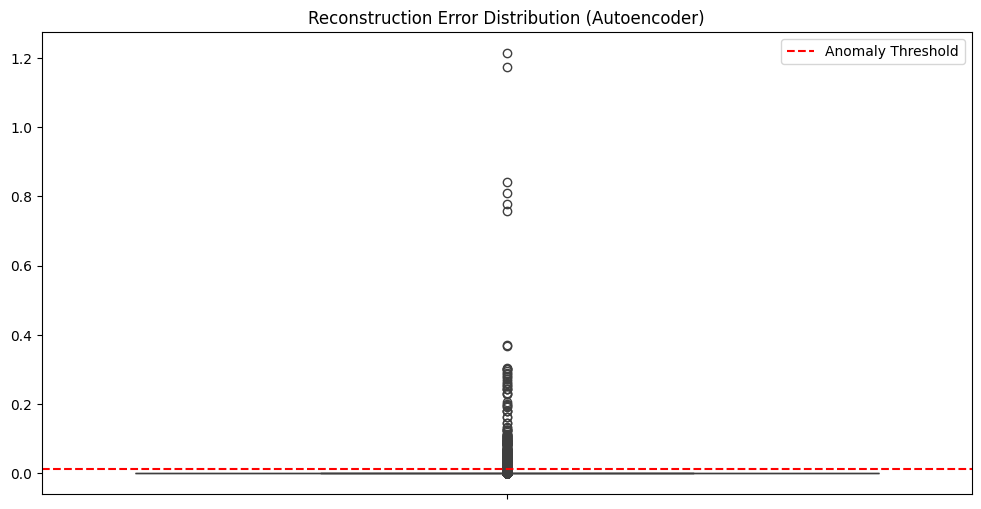

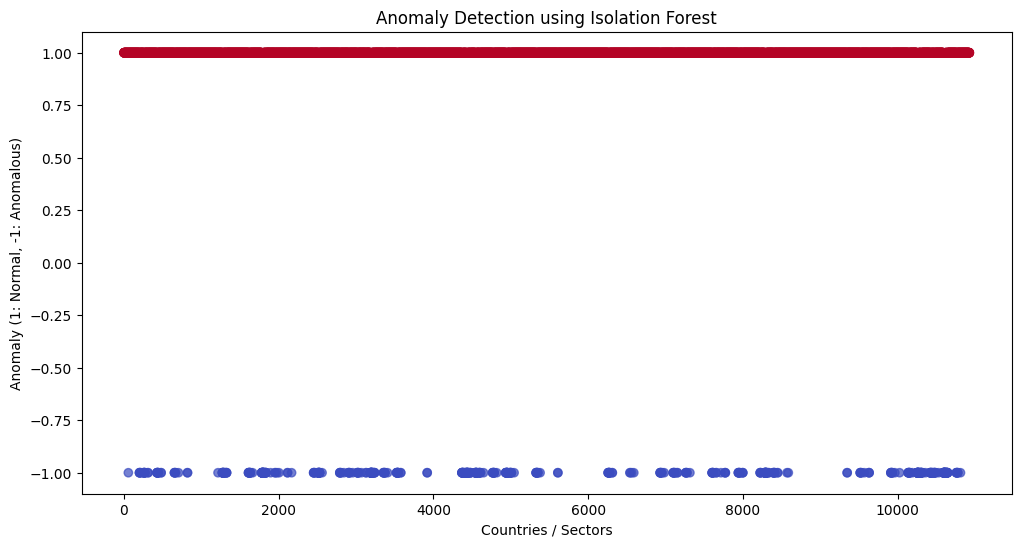

Anomaly_Flag  Anomaly_Score
Normal         2               8709
Anomalous      0               1669
              -1                257
Normal         1                191
               3                 99
Anomalous     -2                  3
Name: count, dtype: int64


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load dataset
file_path = "world_sectorWise.csv"  # Ensure correct path
df = pd.read_csv(file_path)

# Select numerical features (e.g., emissions data from 1990-2020)
feature_columns = [str(year) for year in range(1990, 2021)]
X = df[feature_columns].fillna(0)  # Handling missing values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------
# 🔹 Isolation Forest
# ----------------------
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['IsolationForest_Anomaly'] = iso_forest.fit_predict(X_scaled)

# ----------------------
# 🔹 One-Class SVM
# ----------------------
svm = OneClassSVM(nu=0.05, kernel="rbf")
df['OneClassSVM_Anomaly'] = svm.fit_predict(X_scaled)

# ----------------------
# 🔹 Autoencoder for Anomaly Detection
# ----------------------
input_dim = X_scaled.shape[1]

# Build Autoencoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.1, verbose=0)

# Compute Reconstruction Error
X_reconstructed = autoencoder.predict(X_scaled)
reconstruction_error = np.mean(np.abs(X_scaled - X_reconstructed), axis=1)
threshold = np.percentile(reconstruction_error, 95)  # Top 5% anomalies
df['Autoencoder_Anomaly'] = (reconstruction_error > threshold).astype(int)

# ----------------------
# 🔹 Visualization of Anomalies
# ----------------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=reconstruction_error)
plt.axhline(y=threshold, color='r', linestyle='--', label="Anomaly Threshold")
plt.title("Reconstruction Error Distribution (Autoencoder)")
plt.legend()
plt.show()

# Plot Isolation Forest Anomalies
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['IsolationForest_Anomaly'], c=df['IsolationForest_Anomaly'], cmap='coolwarm', alpha=0.7)
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Countries / Sectors")
plt.ylabel("Anomaly (1: Normal, -1: Anomalous)")
plt.show()

# ----------------------
# 🔹 Summary of Anomaly Detections
# ----------------------
df['Anomaly_Score'] = df[['IsolationForest_Anomaly', 'OneClassSVM_Anomaly', 'Autoencoder_Anomaly']].sum(axis=1)
df['Anomaly_Flag'] = df['Anomaly_Score'].apply(lambda x: "Anomalous" if x < 1 else "Normal")

print(df[['Anomaly_Flag', 'Anomaly_Score']].value_counts())


----------------------------------------
Unique Problem Statement for Time-Series Forecasting of Greenhouse Gas Emissions


🌍 Title: Forecasting Global Greenhouse Gas (GHG) Emissions for Climate Policy and Sustainability
🔎 Context:
As global carbon emissions continue to rise, accurate forecasting of future greenhouse gas (GHG) emissions is critical for climate action planning, policy-making, and economic sustainability. Predicting emissions trends can help governments, industries, and environmental organizations take preventive actions and implement effective carbon reduction strategies before reaching critical climate thresholds.

🚀 Problem Statement:
"Develop a machine learning-based time-series forecasting model to predict future greenhouse gas (GHG) emissions across different countries and economic sectors. The model should capture long-term trends, seasonal variations, and policy-driven shifts, providing actionable insights for global climate mitigation efforts."

🎯 Research Objectives:
✅ Implement & compare advanced time-series forecasting models (LSTM, ARIMA, Prophet, XGBoost)
✅ Predict emissions trends for countries and sectors based on historical emissions data
✅ Analyze the impact of policy changes, industrial growth, and energy transitions on future emissions
✅ Provide interpretable forecasts for policymakers to make data-driven environmental decisions

📈 Expected Outcomes:
✅ Accurate emissions predictions to guide global climate policies
✅ Identification of key trends and factors influencing emissions growth or decline
✅ A robust forecasting model that enables industries & governments to prepare for future regulations

💡 Why is This Unique?
✅ Uses multiple time-series models to improve forecast accuracy
✅ Provides sector-specific & country-wise insights
✅ Focuses on policy-driven emissions forecasting rather than just trend analysis

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [88]:
df.head()

Country,afg,afg,afg,afg,afg,afg,afg,afg,afg,afg,...,zwe,zwe,zwe,zwe,zwe,zwe,zwe,zwe,zwe,zwe
1990,11.627536,9.238795,2.280285,0.052709,8.065925,1.228617,-2.388741,0.0194,2.04457,6.735120,...,0.0,5.398181,0.098568,0.0021,0.087701,0.067604,26.937019,9.695817,5.937650,0.067604
1991,11.897391,9.508651,2.136023,0.055380,8.389566,1.316422,-2.388741,0.0194,1.93967,7.018419,...,0.0,4.825603,0.099502,0.0037,0.087701,0.064739,28.702519,8.802566,5.351507,0.064739
1992,11.545871,9.157131,1.681061,0.058051,8.402533,1.404227,-2.388741,0.0194,1.52407,7.123979,...,0.0,4.856446,0.100437,0.0021,0.087701,0.061875,28.871119,9.408330,5.410885,0.061875
1993,11.677624,9.288883,1.644098,0.061942,8.479552,1.492032,-2.388741,0.0194,1.52769,7.209408,...,0.0,4.234342,0.101371,0.0019,0.087701,0.059011,27.477119,7.879816,4.781414,0.059011
1994,11.731587,9.342846,1.570136,0.064613,8.517001,1.579837,-2.388741,0.0162,1.49309,7.462436,...,0.0,4.408195,0.102306,0.0026,0.087701,0.056146,26.362019,8.547987,4.952602,0.056146


In [91]:
import pandas as pd

# Load dataset
file_path = "world_sectorWise.csv"
df = pd.read_csv(file_path, header=0)

# Transpose so that countries become rows and years become columns
df = df.T

# Set the first row as column names and reset index
df.columns = df.iloc[0]
df = df[1:]
df.index.name = 'Year'
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(df.mean(), inplace=True)

# Convert index to datetime format
# The error was here. The index contains strings like 'Sector', not years.
# We need to convert the index to integers (years) first.
df.index = pd.to_datetime(df.index.astype(int), format='%Y')




ValueError: invalid literal for int() with base 10: 'Sector'

In [ ]:
# Select country for forecasting
country_name = "India".lower()  # Convert to lowercase for consistency
if country_name in df.columns:
    ts_data = df[country_name]
else:
    print(f"Error: {country_name} not found in dataset!")